## New Version of Figure 1 of the Paper

This figure shows the covariance function and different example light curves using the 
periodic kernel.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set_style("white")
sns.set_palette('viridis')

import numpy as np
import pandas as pd

import george
from george import kernels

<IPython.core.display.Javascript object>


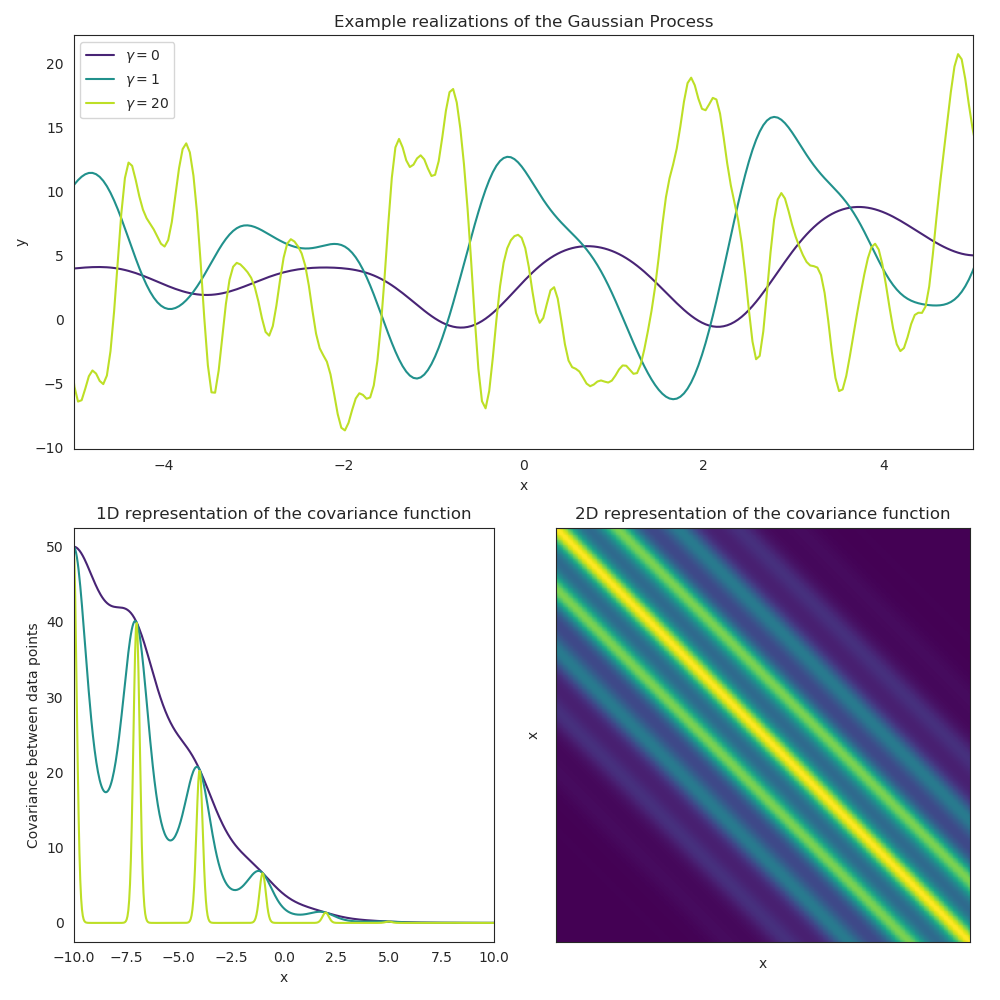

In [2]:
amp_1 = 10.0
metric = 20

amp_2 = 5.0
log_period = np.log(3.0)
gamma = [0.1, 1.0, 20.0]

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 2, figure=fig)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])

x = np.linspace(-10, 10, 500)
for i, g in enumerate(gamma):
    k1 = amp_1 * kernels.ExpSquaredKernel(metric=metric)
    k2 = amp_2 * kernels.ExpSine2Kernel(gamma=g, log_period=log_period)
    kernel = k1*k2 #or k1*k2
    
    kernel_vals = kernel.get_value(np.atleast_2d(x).T)
    ax2.plot(x, kernel_vals[0],  color=sns.color_palette("viridis", 9)[4*i],
             label=r"$\gamma = %2.f$"%g)
    ax2.set_xlim(x[0], x[-1])
    if i == 1:
        ax3.imshow(kernel_vals, cmap="viridis", interpolation="nearest")
        ax3.set_xticklabels([])
        ax3.set_yticklabels([]);
        ax3.set_title("2D representation of the covariance function")
    
    np.random.seed(1234)
    gp = george.GP(kernel)
    gp.compute(x)
    y = gp.sample(size=1)

    ax1.plot(x, y.T+i, lw=1.5, alpha=1.0, color=sns.color_palette("viridis", 9)[4*i],
             label=r"$\gamma = %2.f$"%g)
    ax1.set_xlim(-5, 5);
    
    
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Example realizations of the Gaussian Process")
ax1.legend(loc=2)

ax2.set_xlabel("x")
ax2.set_ylabel("Covariance between data points")
ax2.set_title("1D representation of the covariance function")

ax3.set_xlabel("x")
ax3.set_ylabel("x")

plt.tight_layout()
plt.savefig("../paper/fig1.pdf", format='pdf')

<IPython.core.display.Javascript object>


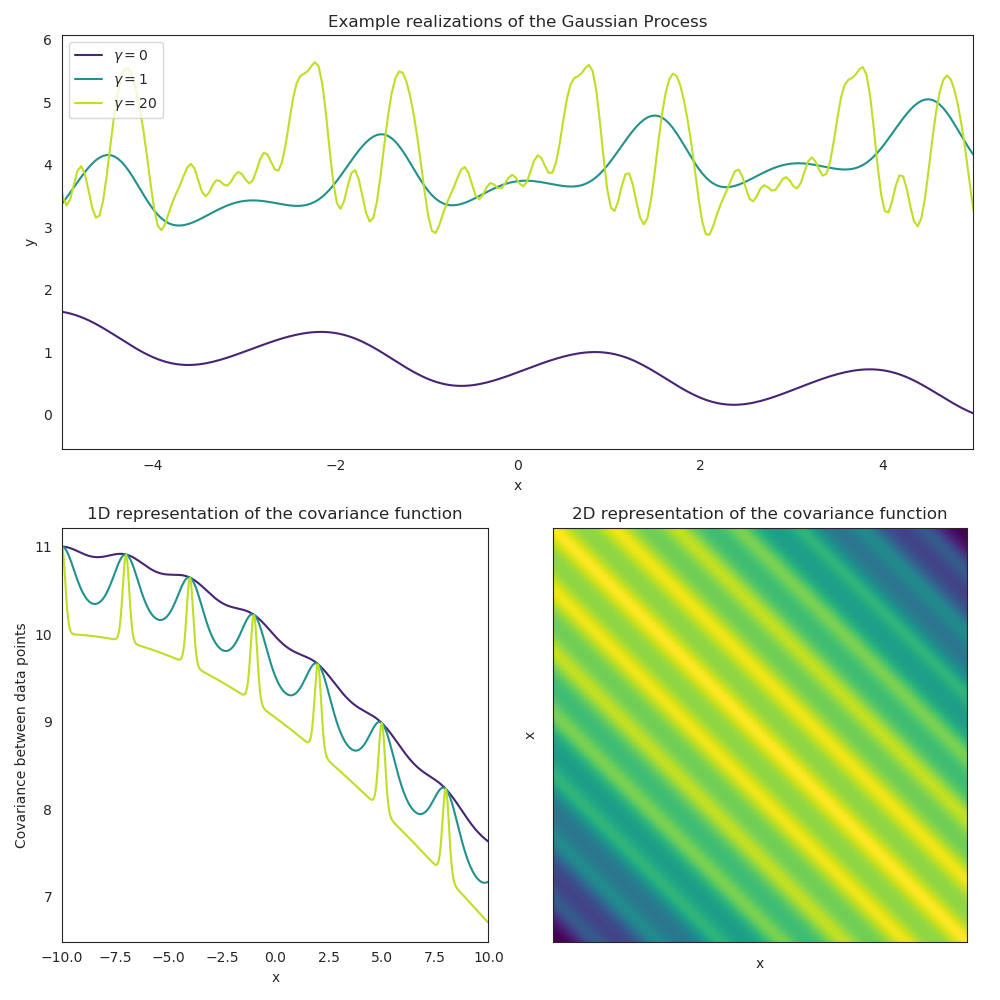

In [3]:
amp_1 = 10.0
metric = 500

amp_2 = 1.0
log_period = np.log(3.0)
gamma = [0.1, 1.0, 20.0]

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 2, figure=fig)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])

x = np.linspace(-10, 10, 500)
for i, g in enumerate(gamma):
    k1 = amp_1 * kernels.ExpSquaredKernel(metric=metric)
    k2 = amp_2 * kernels.ExpSine2Kernel(gamma=g, log_period=log_period)
    kernel = k1+k2 #or k1*k2
    
    kernel_vals = kernel.get_value(np.atleast_2d(x).T)
    ax2.plot(x, kernel_vals[0],  color=sns.color_palette("viridis", 9)[4*i],
             label=r"$\gamma = %2.f$"%g)
    ax2.set_xlim(x[0], x[-1])
    if i == 1:
        ax3.imshow(kernel_vals, cmap="viridis", interpolation="nearest")
        ax3.set_xticklabels([])
        ax3.set_yticklabels([]);
        ax3.set_title("2D representation of the covariance function")
    
    np.random.seed(1234)
    gp = george.GP(kernel)
    gp.compute(x)
    y = gp.sample(size=1)

    ax1.plot(x, y.T+i, lw=1.5, alpha=1.0, color=sns.color_palette("viridis", 9)[4*i],
             label=r"$\gamma = %2.f$"%g)
    ax1.set_xlim(-5, 5);
    
    
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Example realizations of the Gaussian Process")
ax1.legend(loc=2)

ax2.set_xlabel("x")
ax2.set_ylabel("Covariance between data points")
ax2.set_title("1D representation of the covariance function")

ax3.set_xlabel("x")
ax3.set_ylabel("x")

plt.tight_layout()
#plt.savefig("../paper/fig1.pdf", format='pdf')